In [3]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/AbstractDataset/df-Abstract.csv')
df = df.rename(columns={'No': 'ID', 'Title': 'Title', 'Abstract': 'Abstract', 'Subclass_labels': 'cpc_subclass'})
df_Abstract=df[["ID","Title","Abstract","cpc_subclass"]]
df_Abstract= df_Abstract.dropna()
df_Abstract = df_Abstract.reset_index(drop=True)
df_Abstract.head()

,ID,Title,Abstract,cpc_subclass
0,US07072141,magnetic disc unit with range of gap between d...,a magnetic disc unit having a rotating disc ty...,['G11B']
1,US06981282,systems and methods for transformable suits,methods and systems for transforming a volume ...,['A41D']
2,US06981283,gardening gloves with cushion insert to protec...,a gardening glove or the like designed to prev...,['A41D']
3,US06981284,hockey helmet comprising a lateral adjustment ...,a hockey helmet for receiving a head of a wear...,['A63B']
4,US06981285,toilet and method of operation,a toilet and toilet system suitable for a boat...,['E03D']


In [4]:
df_Abstract_uspto = df_Abstract[df_Abstract['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_Abstract_uspto.head()

,ID,Title,Abstract,cpc_subclass
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']


In [5]:
len(df_Abstract_uspto)

595466

In [6]:
df_Abstract_uspto["Abstract"]= df_Abstract_uspto["Abstract"].dropna()
df_Abstract_uspto = df_Abstract_uspto.reset_index(drop=True)
df_Abstract_uspto

C:\Users\admin\AppData\Local\Temp/ipykernel_16120/868608903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto["Abstract"]= df_Abstract_uspto["Abstract"].dropna()


,ID,Title,Abstract,cpc_subclass
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']
...,...,...,...,...
595461,US08975581,ion trap,an ion trap comprising a first array of magnet...,['H01J']
595462,US08976203,wavelength conversion device and image display...,a wavelength conversion device includes an exc...,"['G09G', 'G03B', 'H01S', 'H04N']"
595463,US08976510,cable assembly and electronic device,an electronic device including an electronic u...,"['H05K', 'H01R']"
595464,US08976819,circuit and method for metering electricity,a current detection module generates a first c...,"['H04J', 'G01R']"


In [7]:
df_Abstract_uspto=df_Abstract_uspto[:60000]
len(df_Abstract_uspto)

60000

# preprocessing

In [8]:
def cleantext(df_Abstract_uspto):
    # Remove unwanted characters like quotes, commas, periods, question marks, etc. from the 'Abstract' column
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['Abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # Convert all text to lowercase
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].str.lower()
    
    # Remove all numbers from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text'] =df_Abstract_uspto['cleaned_Abstract_text'].replace(r'\d+', '', regex = True)
        
    # Remove all non-alphanumeric characters from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    # Remove all punctuation from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    # Remove all URLs from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'https.*$', "", regex = True)
    
    # Replace multiple spaces with a single space
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("   ", " ", regex = True)
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("  ", " ", regex = True)
   
    return df_Abstract_uspto

# Call the 'cleantext' function on the 'df_Abstract_uspto' dataframe
df_Abstract_uspto = cleantext(df_Abstract_uspto)
df_Abstract_uspto.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_16120/2232787442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['Abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
C:\Users\admin\AppData\Local\Temp/ipykernel_16120/2232787442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].str.lower()
C:\Users\admin\AppData\Local\Temp/ipykernel_1

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...


In [9]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_Abstract_uspto['cleaned_Abstract_text_without_Stopwprd'] = df_Abstract_uspto['cleaned_Abstract_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_Abstract_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\admin\AppData\Local\Temp/ipykernel_16120/2358027427.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['cleaned_Abstract_text_without_Stopwprd'] = df_Abstract_uspto['cleaned_Abstract_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...


In [10]:
# import the WordNetLemmatizer class from the nltk library
from nltk.stem import WordNetLemmatizer

# create an instance of the WordNetLemmatizer class
lemmatizer = WordNetLemmatizer()

# define a function to lemmatize words in a text
def lemmatize_words(text):
    # split the text into individual words, lemmatize each word, and join them back together into a string
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# apply the lemmatize_words function to the cleaned abstract text without stopwords column of the dataframe
df_Abstract_uspto["Lemmatized-Abstract"] = df_Abstract_uspto["cleaned_Abstract_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))

# view the updated dataframe with the new lemmatized abstract column
df_Abstract_uspto.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_16120/1233588646.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto["Lemmatized-Abstract"] = df_Abstract_uspto["cleaned_Abstract_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...


In [11]:
#tokenize corpus
nltk.download('punkt')

#tokenize a string into words
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply the tokenization function to each row of the 'text' column
df_Abstract_uspto['Abstract_tokens'] = df_Abstract_uspto["Lemmatized-Abstract"].apply(tokenize_text)
df_Abstract_uspto.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\admin\AppData\Local\Temp/ipykernel_16120/3692672784.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['Abstract_tokens'] = df_Abstract_uspto["Lemmatized-Abstract"].apply(tokenize_text)


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...,"[mounting, ic, chip, circuit, board, bump, for..."
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...,"[article, footwear, sole, insole, overlying, s..."
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...,"[electrical, connector, nonrigidly, apply, for..."
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...,"[flexible, bar, handler, comprises, mobile, ca..."
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...,"[brush, holder, incorporates, terminal, integr..."


# divide the dataset

In [12]:
#Divide the dataset into different size
df_Abstract_50K=df_Abstract_uspto[:50000]
df_Abstract_50K

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...,"[mounting, ic, chip, circuit, board, bump, for..."
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...,"[article, footwear, sole, insole, overlying, s..."
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...,"[electrical, connector, nonrigidly, apply, for..."
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...,"[flexible, bar, handler, comprises, mobile, ca..."
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...,"[brush, holder, incorporates, terminal, integr..."
...,...,...,...,...,...,...,...,...
49995,US07180993,associating call appearance with data associat...,a distributed telephone answering system has i...,['H04M'],a distributed telephone answering system has i...,distributed telephone answering intelligence d...,distributed telephone answering intelligence d...,"[distributed, telephone, answering, intelligen..."
49996,US07262479,layout structure of fuse bank of semiconductor...,a fuse bank of a semiconductor memory device i...,['H01L'],a fuse bank of a semiconductor memory device i...,fuse bank semiconductor memory provided fuse b...,fuse bank semiconductor memory provided fuse b...,"[fuse, bank, semiconductor, memory, provided, ..."
49997,US07279979,method and arrangement for adjusting an output...,the invention relates to power amplifiers havi...,['H03G'],the invention relates to power amplifiers havi...,relates power amplifiers adjustable output imp...,relates power amplifier adjustable output impe...,"[relates, power, amplifier, adjustable, output..."
49998,US07224052,ic card with controller and memory chips,an ic card capable of reinforcing the preventi...,"['H01L', 'G06K']",an ic card capable of reinforcing the preventi...,ic card capable reinforcing prevention electro...,ic card capable reinforcing prevention electro...,"[ic, card, capable, reinforcing, prevention, e..."


In [14]:
New_Sample = df_Abstract_uspto.iloc[59394:59395, :]
New_Sample

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
59394,US07187658,data transmission apparatus selecting efficien...,a data transmission apparatus is provided for ...,"['G06F', 'H04L']",a data transmission apparatus is provided for ...,transmission provided transmitting received us...,transmission provided transmitting received us...,"[transmission, provided, transmitting, receive..."


# LDA on 50K patent

In [15]:
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_Abstract_50K['Lemmatized-Abstract']]

# Apply n-gram (1,3) using the Phrases class from Gensim
bigram_phrases = Phrases(docs, min_count=10)  # bigram model
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)  # trigram model

#quadgram_phraser = Phrases(trigram_phrases[bigram_phrases[docs]])
#docs = [quadgram_phraser[trigram_phrases[bigram_phrases[doc]]] for doc in docs]

docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]  # apply the trigram model to the tokenized documents

# Create the dictionary and document-term matrix using the Dictionary class from Gensim
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)  # remove infrequent and very frequent words from the dictionary
corpus = [id2word.doc2bow(doc) for doc in docs]  # convert the tokenized documents to a bag-of-words corpus

# Train the LDA model using the LdaModel class from Gensim
num_topics = 50  # the number of topics to discover
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, random_state=42)

# Transform the corpus to get the topic distribution for each document
lda_output = lda_model[corpus]

# Calculate coherence metrics using the CoherenceModel class from Gensim
cm_cv = CoherenceModel(model=lda_model, corpus=corpus, texts=docs, dictionary=id2word, coherence='c_v')
coherence_cv = cm_cv.get_coherence()  # get the coherence score for the C_v metric

cm_npmi = CoherenceModel(model=lda_model, texts=docs, corpus=corpus, dictionary=id2word, coherence='c_npmi')
coherence_npmi = cm_npmi.get_coherence()  # get the coherence score for the c_npmi metric

cm_umass = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_umass = cm_umass.get_coherence()  # get the coherence score for the u_mass metric

# Print the coherence scores
print('C_v coherence:', coherence_cv)
print('c_npmi coherence:', coherence_npmi)
print('u_mass coherence:', coherence_umass)

C_v coherence: 0.47285323195109663
c_npmi coherence: -0.03708827589619598
u_mass coherence: -5.893789878955703


In [16]:
# Print the most significant words for each topic in the model
for topic_num in range(lda_model.num_topics):
    # Get the top 5 words for the current topic
    top_words = lda_model.show_topic(topic_num, topn=10)
    # Join the words into a single string for printing
    word_list = [word for word, _ in top_words]
    topic_words = " ".join(word_list)
    # Print the topic number and its top words
    print(f"Topic #{topic_num}: {topic_words}")

Topic #0: user server request computer may application voice program file response
Topic #1: high buffer low process reduced present used performance size using
Topic #2: digital stage noise analog logic sound speaker scanning pre shift
Topic #3: link mobile_station bus base_station radio system scheme access_point machine procedure
Topic #4: filter circuitry characteristic rf radiation band gain high_frequency linear coefficient
Topic #5: substrate surface side area formed pad disposed lead portion provided
Topic #6: end conductor pair cable wire window one connected aperture connecting
Topic #7: terminal current voltage power connected capacitor load power_supply drive control
Topic #8: region semiconductor formed gate_electrode semiconductor_substrate structure well source_drain_region active_region p_type
Topic #9: circuit output input control amplifier coupled differential signal one feedback
Topic #10: component least_one electrical assembly one coupling part ic x_ray branch
Topi

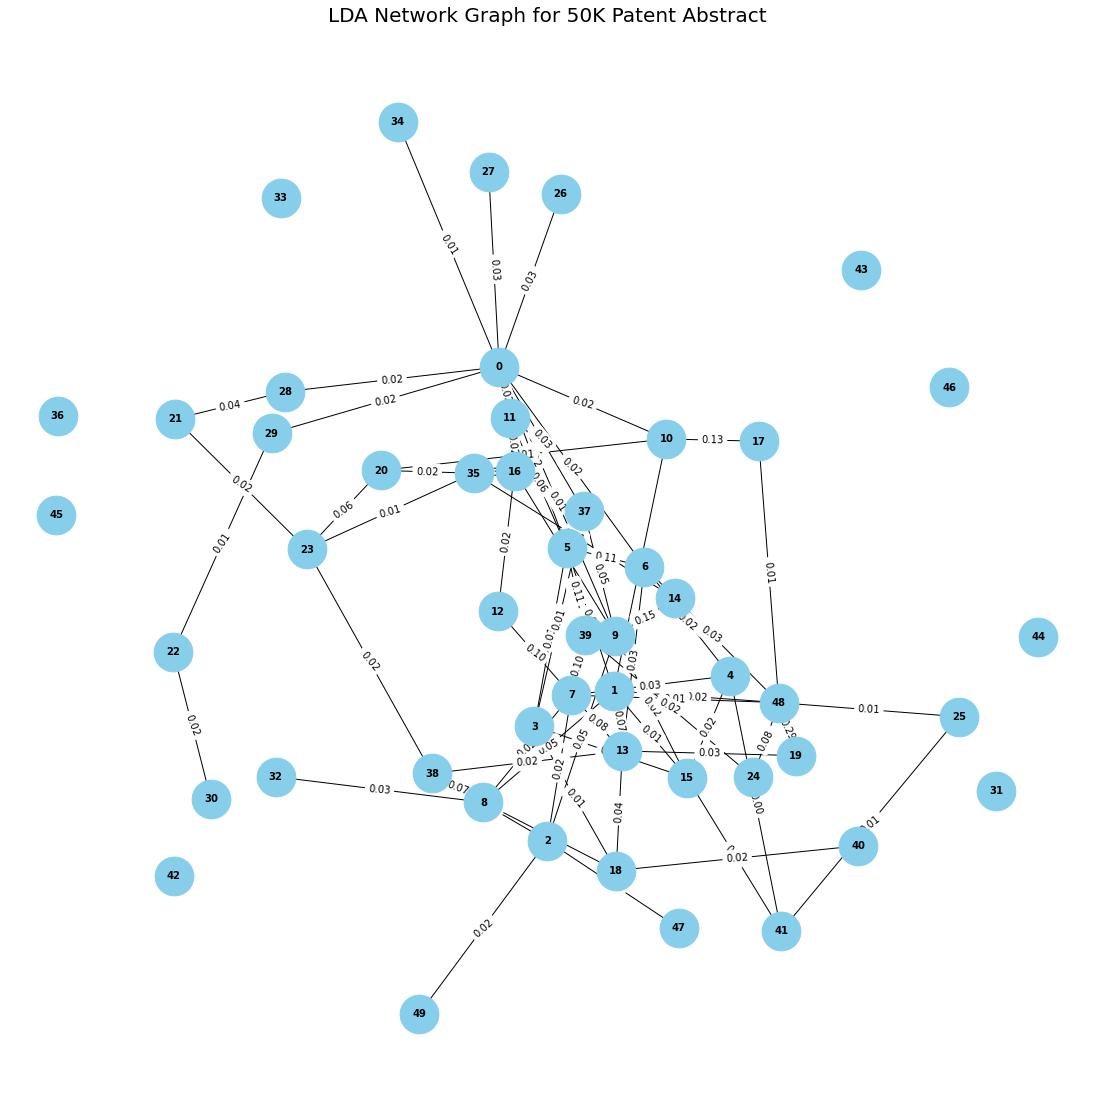

In [40]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

# Get all the topic words
all_topic_words = " ".join([word for topic in lda_model.show_topics(num_topics=50, formatted=False) for word, _ in topic[1]])

# Create a list of the most frequent words
most_frequent_words = [word for word, count in Counter(all_topic_words.split()).most_common(30)]

# Create an empty graph object
G = nx.Graph()

# Add the nodes (topics) to the graph
for i in range(50):
    G.add_node(i)

# Add the edges (terms) to the graph
for i in range(50):
    topic_words = lda_model.show_topic(i, topn=10)
    for word, prob in topic_words:
        if word in most_frequent_words:
            j = most_frequent_words.index(word)
            G.add_edge(i, j, weight=prob)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=1500, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): "{:.2f}".format(d["weight"]) for i, j, d in G.edges(data=True)})
plt.gcf().set_size_inches(15, 15)
plt.title("LDA Network Graph for 50K Patent Abstract",fontsize=20)
plt.show()

In [17]:
#Get the topic and probability for each document

In [18]:
# Get the most probable topic and its probability for each document
doc_topics = [sorted(lda_model.get_document_topics(doc), key=lambda x: x[1], reverse=True) for doc in lda_output]

In [19]:
# Create empty columns for topic number and probability
df_Abstract_50K['LDA_topics'] = 0
df_Abstract_50K['LDA_prob'] = 0.0

# Loop through each document and update the corresponding row in the dataframe
for i, doc in enumerate(doc_topics):
    topic_num, topic_prob = doc[0]
    df_Abstract_50K.at[i, 'LDA_topics'] = topic_num
    df_Abstract_50K.at[i, 'LDA_prob'] = topic_prob

C:\Users\admin\AppData\Local\Temp/ipykernel_16120/2109139511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_50K['LDA_topics'] = 0
C:\Users\admin\AppData\Local\Temp/ipykernel_16120/2109139511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_50K['LDA_prob'] = 0.0


In [21]:
df_Abstract_50K_topic=df_Abstract_50K[["ID","Title","Abstract","cpc_subclass","Lemmatized-Abstract", "LDA_topics", "LDA_prob"]]
df_Abstract_50K_topic

,ID,Title,Abstract,cpc_subclass,Lemmatized-Abstract,LDA_topics,LDA_prob
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],mounting ic chip circuit board bump formed ele...,19,0.341899
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article footwear sole insole overlying sole in...,19,0.317217
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],electrical connector nonrigidly apply force se...,10,0.326260
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],flexible bar handler comprises mobile carriage...,19,0.262109
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],brush holder incorporates terminal integral co...,19,0.283469
...,...,...,...,...,...,...,...
49995,US07180993,associating call appearance with data associat...,a distributed telephone answering system has i...,['H04M'],distributed telephone answering intelligence d...,5,0.200225
49996,US07262479,layout structure of fuse bank of semiconductor...,a fuse bank of a semiconductor memory device i...,['H01L'],fuse bank semiconductor memory provided fuse b...,13,0.262961
49997,US07279979,method and arrangement for adjusting an output...,the invention relates to power amplifiers havi...,['H03G'],relates power amplifier adjustable output impe...,13,0.356654
49998,US07224052,ic card with controller and memory chips,an ic card capable of reinforcing the preventi...,"['H01L', 'G06K']",ic card capable reinforcing prevention electro...,15,0.174107


In [22]:
#prediction

In [23]:
new_Abstract = str(New_Sample["Lemmatized-Abstract"].iloc[0])
new_Abstract

'transmission provided transmitting received user terminal network destination user terminal executing communication using internet protocol transmission routing table storing relating destination address address network table storing static dynamic network selection unit selecting one network transmission transmits destination based static dynamic transmission enables transmission appropriate network selecting appropriate network based static dynamic network'

In [24]:
#query_tokens = quadgram_phraser[trigram_phrases[bigram_phrases[new_Abstract.split()]]]

# Tokenize the new abstract and apply n-gram (1,3)
query_tokens = trigram_phrases[bigram_phrases[new_Abstract.split()]]

# Create a bag of words representation of the query
query_bow = id2word.doc2bow(query_tokens)

# Get the topic distribution for the query using the trained LDA model
query_lda = lda_model[query_bow]

# Print the topic distribution for the query
print(query_lda)

[(7, 0.047269132), (21, 0.120232746), (28, 0.09284831), (31, 0.0380329), (32, 0.25297436), (33, 0.02571403), (37, 0.0957601), (38, 0.22221087), (42, 0.022363955), (43, 0.06555017)]


In [25]:
# Print the most probable topic for the query
most_probable_topic = max(query_lda, key=lambda item: item[1])[0]
print(f"Most probable topic: {most_probable_topic}")

Most probable topic: 32


In [26]:
# Sort the list of topics in descending order based on their weights
sorted_topics = sorted(query_lda, key=lambda item: item[1], reverse=True)

# Select the top 3 topics from the sorted list
top_topics = [topic[0] for topic in sorted_topics[:3]]

# Print the 3 most probable topics
print(f"3 most probable topics: {top_topics}")

3 most probable topics: [32, 38, 21]


In [31]:
# Print the most significant words for the topic
top_words = lda_model.show_topic(21, topn=10)
print(f"Most probable topic for the query: {' '.join(word for word, _ in top_words)}")

Most probable topic for the query: value time detection sample reference based error detected detecting predetermined


In [26]:
# filter the documents that have a predicted topic (for example here predicted topi for query is 21)

In [30]:
filter_topics_lda=df_Abstract_50K_topic[df_Abstract_50K_topic['LDA_topics'] == 21]
filter_topics_lda = filter_topics_lda.sort_values('LDA_prob', ascending=False)
filter_topics_lda = filter_topics_lda.reset_index().rename(columns={'index': 'new_index'})
filter_topics_lda

,new_index,ID,Title,Abstract,cpc_subclass,Lemmatized-Abstract,LDA_topics,LDA_prob
0,1242,US06982385,wire cable of electrical conductor forming of ...,a wire cable of electrical conductor forming o...,['H01B'],wire cable electrical conductor forming metal ...,21,0.404016
1,499,US07034466,standby lighting control for high intensity di...,a high intensity discharge lamp which includes...,['H05B'],high intensity discharge lamp high intensity d...,21,0.390869
2,36464,US07113140,converter for radio wave reception and antenna...,a radio wave reception converter receives a ra...,['H01Q'],radio wave reception converter receives radio ...,21,0.386542
3,621,US07034767,helical coil magnetic core antenna,a device by an antenna where the coil conducto...,['H01Q'],antenna coil conductor antenna wound around fe...,21,0.386471
4,25013,US07068424,multiple pulse generation,an electromagnetic radiation emr multiple puls...,"['G01J', 'H01S', 'G02B']",electromagnetic radiation emr pulse generator,21,0.371420
...,...,...,...,...,...,...,...,...
445,12929,US07021947,method and assembly for connecting a coaxial c...,an assembly for connecting a coaxial cable to ...,['H01R'],assembly connecting coaxial cable connecting p...,21,0.127849
446,22415,US07059926,method of making a spark plug having a multi t...,a method of making an ignition device and cent...,['H01T'],making ignition center wire assembly first sec...,21,0.127289
447,22446,US07060388,nonaqueous electrolyte secondary battery,an electric power generating element of a batt...,['H01M'],electric power generating element battery cove...,21,0.127110
448,28305,US07079728,wavelength multiplexing processing apparatus,a wavelength multiplexing processing apparatus...,"['G02B', 'H04J']",wavelength multiplexing processing use wavelen...,21,0.124831


In [28]:
#calculate the similarity between the query and document in dataset with the Doc2Vec embedding

In [32]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity

# Convert the list of documents to a list of sentences
sentences = [doc.split() for doc in filter_topics_lda['Lemmatized-Abstract'].tolist()]

# Create a list of TaggedDocument objects, where each TaggedDocument represents a single document in the corpus
# The words attribute of each TaggedDocument is set to a list of tokens for the corresponding document
# The tags attribute of each TaggedDocument is set to a list containing a single string, which is the index of the document in the corpus
tagged_data = [TaggedDocument(words=sentences[i], tags=[str(i)]) for i in range(len(sentences))]

# Train a Doc2Vec model on the tagged documents
# The vector_size parameter specifies the dimensionality of the document vectors
# The window parameter specifies the maximum distance between the predicted word and the context words within a sentence
# The min_count parameter specifies the minimum frequency of a word in the corpus to be included in the vocabulary
# The epochs parameter specifies the number of iterations over the corpus during training
model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=5, epochs=50)

# Infer the document vector for the new claim
# The split() method converts the string to a list of tokens
# The infer_vector() method calculates the document vector using the trained model
new_claim_vector = model.infer_vector(new_Abstract.split())

# Calculate the cosine similarity between the new claim and the documents in the corpus
# The infer_vector() method is called for each document in the corpus to calculate the document vectors
doc_vectors = [model.infer_vector(sentences[i]) for i in range(len(sentences))]
similarity_scores = cosine_similarity([new_claim_vector], doc_vectors)

In [33]:
# Add a new column to the dataframe to store the similarity scores
filter_topics_lda['cosin_similarity_Doc2vec'] = similarity_scores[0]
filter_topics_lda

,new_index,ID,Title,Abstract,cpc_subclass,Lemmatized-Abstract,LDA_topics,LDA_prob,cosin_similarity_Doc2vec
0,1242,US06982385,wire cable of electrical conductor forming of ...,a wire cable of electrical conductor forming o...,['H01B'],wire cable electrical conductor forming metal ...,21,0.404016,0.137440
1,499,US07034466,standby lighting control for high intensity di...,a high intensity discharge lamp which includes...,['H05B'],high intensity discharge lamp high intensity d...,21,0.390869,0.397154
2,36464,US07113140,converter for radio wave reception and antenna...,a radio wave reception converter receives a ra...,['H01Q'],radio wave reception converter receives radio ...,21,0.386542,0.119238
3,621,US07034767,helical coil magnetic core antenna,a device by an antenna where the coil conducto...,['H01Q'],antenna coil conductor antenna wound around fe...,21,0.386471,-0.144656
4,25013,US07068424,multiple pulse generation,an electromagnetic radiation emr multiple puls...,"['G01J', 'H01S', 'G02B']",electromagnetic radiation emr pulse generator,21,0.371420,0.025891
...,...,...,...,...,...,...,...,...,...
445,12929,US07021947,method and assembly for connecting a coaxial c...,an assembly for connecting a coaxial cable to ...,['H01R'],assembly connecting coaxial cable connecting p...,21,0.127849,-0.029007
446,22415,US07059926,method of making a spark plug having a multi t...,a method of making an ignition device and cent...,['H01T'],making ignition center wire assembly first sec...,21,0.127289,-0.236119
447,22446,US07060388,nonaqueous electrolyte secondary battery,an electric power generating element of a batt...,['H01M'],electric power generating element battery cove...,21,0.127110,0.028367
448,28305,US07079728,wavelength multiplexing processing apparatus,a wavelength multiplexing processing apparatus...,"['G02B', 'H04J']",wavelength multiplexing processing use wavelen...,21,0.124831,0.200021


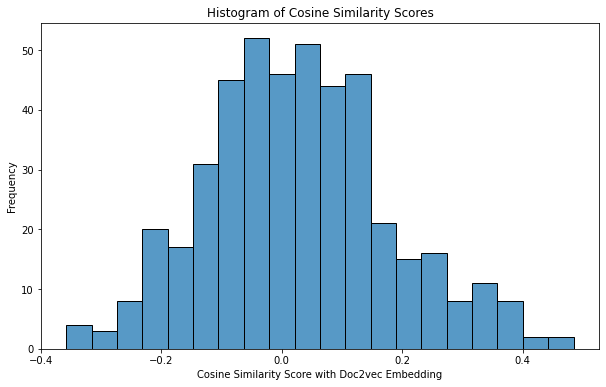

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_lda['cosin_similarity_Doc2vec']

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20)
plt.title('Histogram of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity Score with Doc2vec Embedding')
plt.ylabel('Frequency')
plt.show()

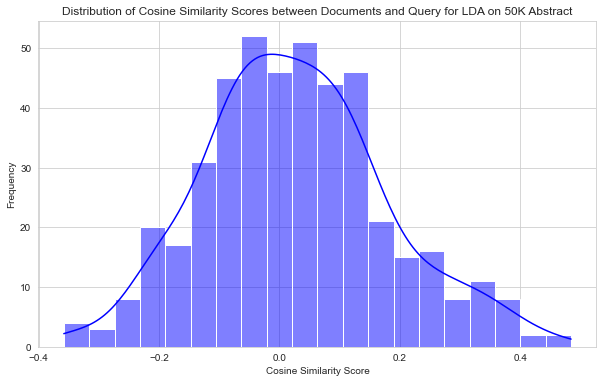

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_lda['cosin_similarity_Doc2vec']

# Set the style of the plot
sns.set_style("whitegrid")

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20, kde=True, color='blue')

# Set chart title and labels
plt.title('Distribution of Cosine Similarity Scores between Documents and Query for LDA on 50K Abstract')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [36]:
#get the most similar doc in dataset to query

In [37]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_lda = filter_topics_lda.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_lda.iloc[0]['Abstract']

most_similar_doc

'a 2 wire control system which communicates with a plurality of pole mounted push button stations of the kind that are found at a traffic light controlled intersection via existing pairs of underground wires over which power and data signals are transmitted so as to enable a visually impaired pedestrian to receive both audible and tactile signals regarding the flow of vehicular traffic through the intersection the 2 wire control system includes a central control unit that is located at a traffic light control cabinet and is connected to a standard traffic signal light controller the control unit includes a plurality of 2 wire output ports that are connected to respective pairs of the plurality of push button stations the central control unit also includes a corresponding plurality of on off controls and data interfaces by which each of the 2 wire output ports thereof is provided with the power and data signals to be transmitted to respective pairs of push button stations depending upon

In [38]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_lda = filter_topics_lda.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_lda.iloc[0]['Lemmatized-Abstract']

most_similar_doc

'wire control communicates pole mounted push button station kind found traffic light controlled intersection via existing pair underground wire power signal transmitted enable visually impaired pedestrian receive audible tactile signal regarding flow vehicular traffic intersection wire control central control unit located traffic light control cabinet connected standard traffic signal light controller control unit wire output port connected respective pair push button station central control unit control interface wire output port provided power signal transmitted respective pair push button station depending upon entry pedestrian request illumination walk walk message'

In [39]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_lda = filter_topics_lda.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_lda.iloc[0]['ID']

most_similar_doc

'US07145476'